['list_classes', 'train_set_x', 'train_set_y']
Shape of train_x_orig: (209, 64, 64, 3)
Shape of train_y: (209,)
Classes: [b'non-cat' b'cat']
y = 0  - It's a non-cat picture.


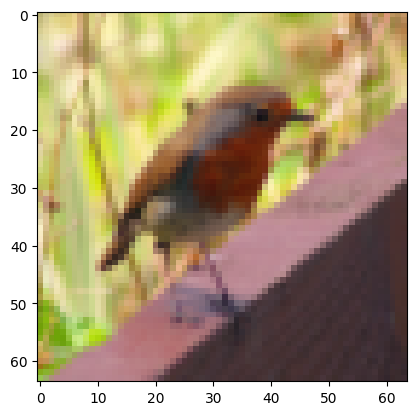

In [42]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image

# Loading train and test datasets from the file directory
train_dataset = h5py.File(r"C:\Users\Taiwo Alare\OneDrive\train_catvnoncat.h5")
test_dataset = h5py.File(r"C:\Users\Taiwo Alare\OneDrive\test_catvnoncat.h5")

# Checking for keys in the datasets
print(list(train_dataset.keys()))

# Accessing dataset components
train_x_orig = np.array(train_dataset['train_set_x'][:]) # Features: images of shape (64, 64, 3)
train_y = np.array(train_dataset['train_set_y'][:]) # Labels: corresponding boolean values
classes = np.array(train_dataset['list_classes'][:]) # Class names

# Print shape of data
print("Shape of train_x_orig:", train_x_orig.shape)
print("Shape of train_y:", train_y.shape)
print("Classes:", classes)

# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print("y =", train_y[index], " - It's a", classes[train_y[index]].decode("utf-8"), "picture.")

# Debugging



In [43]:
# Load training set features and labels
train_features = np.array(train_dataset["train_set_x"][:])
train_labels = np.array(train_dataset["train_set_y"][:])

# Load test set features and labels
test_features = np.array(test_dataset["test_set_x"][:])  # Test set features
test_labels = np.array(test_dataset["test_set_y"][:])  # Test set labels

# Load class names
classes = np.array(test_dataset["list_classes"][:])

# Print shapes and class names
print(train_features.shape)  # Shape of training set features
print(train_labels.shape)    # Shape of training set labels
print(classes.shape)         # Shape of class names
print(classes)               # Display class names (numpy.bytes_ type)

# Reshape labels to match the required format
train_labels = train_labels.reshape((1, train_labels.shape[0]))
test_labels = test_labels.reshape((1, test_labels.shape[0]))

# Print the new shape of labels
print(train_labels.shape)  # New shape of training set labels


(209, 64, 64, 3)
(209,)
(2,)
[b'non-cat' b'cat']
(1, 209)


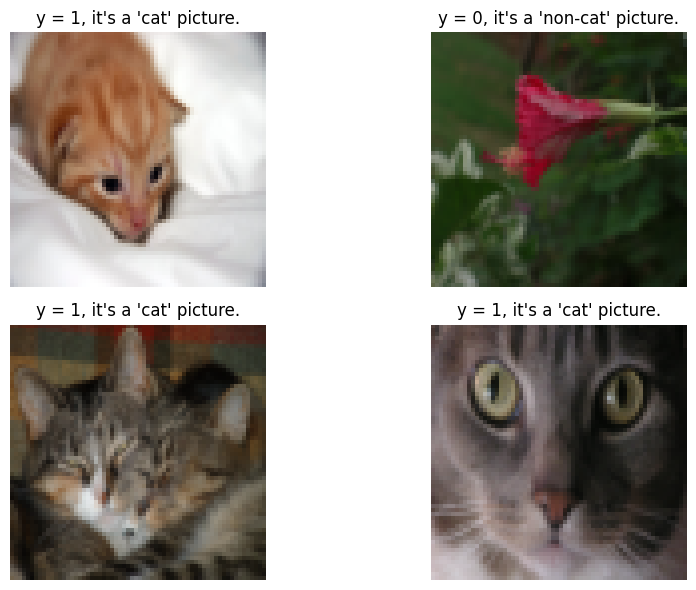

In [44]:
# The indices of images that we want to look at
indices = [57, 58, 59, 60]

# Creating a figure with a specified size
fig = plt.figure(figsize=(10, 6)) # I prefer a small size picture

# Set the number of rows and columns for subplots
rows = 2
columns = 2

# Looping through the selected indices
for i, index in enumerate(indices):
    # Add a subplot to the figure
    fig.add_subplot(rows, columns, i + 1)  # i + 1 is the subplot index (1, 2, 3, 4)
    
    # Displaying  the image
    plt.imshow(train_features[index])
    
    # Turning off-axis labels for better visualization
    plt.axis('off')
    
    # Generating title with the label information
    plt.title(
        "y = " + str(train_labels[0, index]) +
        ", it's a '" + classes[np.squeeze(train_labels[:, index])].decode("utf-8") +  "' picture."
    )

# Adjusting layout for better spacing
plt.tight_layout()

# Displaying the figure
plt.show()


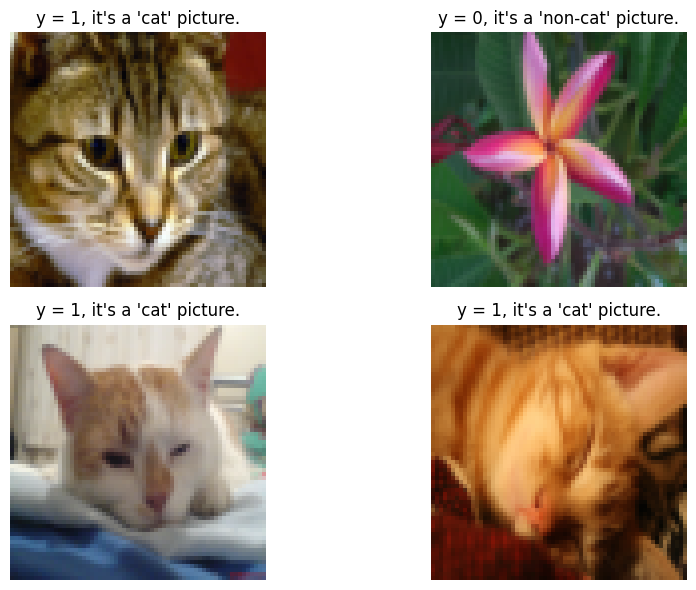

In [45]:
# Define the indices of images that we want to look at
indices = [15, 16, 17, 18]

# Create a figure with a specified size
fig = plt.figure(figsize=(10, 6)) 

# Set the number of rows and columns for subplots
rows = 2
columns = 2

# Loop through the selected indices
for i, index in enumerate(indices):
    # Add a subplot to the figure
    fig.add_subplot(rows, columns, i + 1)  # i + 1 is the subplot index (1, 2, 3, 4)
    
    # Display the image from the test set
    plt.imshow(test_features[index])
    
    # Turning off-axis labels for better visualization
    plt.axis('off')
    
    # Generate title with label information
    plt.title(
        "y = " + str(test_labels[0, index]) +
        ", it's a '" + classes[np.squeeze(test_labels[:, index])].decode("utf-8") +  "' picture."
    )

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()



In [46]:
# Flatten the training set images and normalize
train_X_flat = (train_features.reshape(train_features.shape[0], -1) / 255).T

# Print the shape of the flattened training set
print(train_X_flat.shape)

# Flatten the test set images and normalize
test_X_flat = (test_features.reshape(test_features.shape[0], -1) / 255).T


(12288, 209)


In [47]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    Arguments:
    z -- A scalar or numpy array of any size.

    Returns:
    Sigmoid of z, element-wise.
    """
    return 1 / (1 + np.exp(-z))


In [48]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    Parameters:
    z (float or numpy.ndarray): Input value(s).

    Returns:
    numpy.ndarray: Sigmoid of z, element-wise.
    """
    return 1 / (1 + np.exp(-z))


In [54]:
# the training set
# Set X and Y to training data
X = train_X_flat
Y = train_y

# Get the number of features
dim = train_X_flat.shape[0]

# Initialize weights w with shape (dim, 1) and bias b as a scalar
w = np.zeros((dim, 1))
b = 0

# Set the number of iterations for training
num_iterations = 10000

# Set the learning rate for gradient descent
learning_rate = 0.006

# Define how often to record and print out the cost
record_cost = 50

# List to store costs for visualization
costs = []

# Loop for training iterations
for i in range(num_iterations):
    # Calculate gradients and cost using propagate function
    dw, db, cost = propagate(w, b, X, Y)

    # Update weights and bias using gradient descent
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)

    # Record the costs for visualization
    if i % record_cost == 0:
        costs.append(cost)
        print(f"Cost after iteration {i} is: {cost}")

# Save weights and biases to .mat files
scipy.io.savemat("weights.mat", {"weights": w})
scipy.io.savemat("biases.mat", {"biases": b})


NameError: name 'propagate' is not defined